In [1]:
## Importing Pandas Library
import pandas as pd 

## Reading data 
marketing = pd.read_csv('bank-additional-full.csv', sep = ';')

## Printing the first 5 observations
marketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
## Importing Numpy Library
import numpy as np

## Creating conversion (1 for yes and 0 for no)
marketing['conversion'] = np.where(marketing.y == 'yes', 1, 0)

In [3]:
## Counting the number of clients that subscribed
numb_conversion = marketing['conversion'].sum()

## Counting the number of clients in the dataset
numb_clients = marketing.shape[0]

## Computing conversion rate
conversion_rate = numb_conversion / numb_clients

In [4]:
## Conversion by age
numb_conversion = marketing.groupby('age')['conversion'].sum() 

## Number of clients by age
numb_clients = marketing.groupby('age')['conversion'].count()

## Putting the data together
age_conversion = pd.DataFrame({'age' : numb_conversion.index.values, 'numb_conversion' : numb_conversion, 'numb_clients' : numb_clients}).reset_index(drop = True)

## Computing conversin by age
age_conversion['conversion'] = age_conversion['numb_conversion'] / age_conversion['numb_clients']

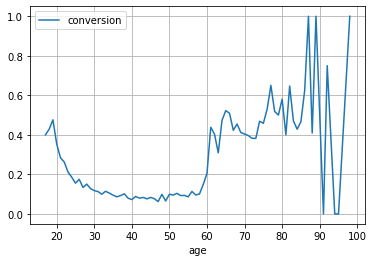

In [5]:
## Visualizing conversion by age
import matplotlib.pyplot as plt

age_conversion.plot(kind = 'line', x = 'age', y = 'conversion')
plt.grid()
plt.show()

<AxesSubplot:title={'center':'Conversion by Age-Group'}, xlabel='age_group'>

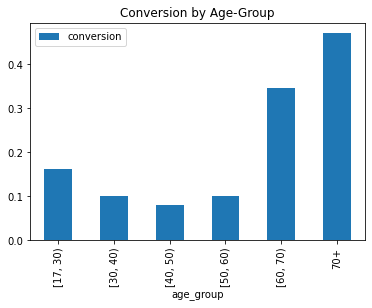

In [6]:
## Creating age groups
marketing['age_group'] = np.where(marketing.age < 30, '[17, 30)', 
                                 np.where((marketing.age >= 30) & (marketing.age < 40), '[30, 40)', 
                                         np.where((marketing.age >= 40) & (marketing.age < 50), '[40, 50)', 
                                                 np.where((marketing.age >= 50) & (marketing.age < 60), '[50, 60)', 
                                                         np.where((marketing.age >= 60) & (marketing.age < 70), '[60, 70)', '70+')))))

## Conversion by age group
numb_conversion = marketing.groupby('age_group')['conversion'].sum() 

## Number of clients by age group
numb_clients = marketing.groupby('age_group')['conversion'].count()

## Putting the data together
age_group_conversion = pd.DataFrame({'age_group' : numb_conversion.index.values, 'numb_conversion' : numb_conversion, 'numb_clients' : numb_clients}).reset_index(drop = True)

## Computing conversion by age groups
age_group_conversion['conversion'] = age_group_conversion['numb_conversion'] / age_group_conversion['numb_clients']

## Sorting the age groups
age_group_conversion['age_group'] = pd.Categorical(age_group_conversion['age_group'], 
                                                   categories = ['[17, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+'],
                                                   ordered = True)
age_group_conversion = age_group_conversion.sort_values('age_group')

## Visualizing the conversion by age group
age_group_conversion.plot(kind = 'bar', x = 'age_group', y = 'conversion', title = 'Conversion by Age-Group')

In [7]:
## Conversion vs non-conversion by marital status
pd.pivot_table(marketing, values = 'y', index = 'marital', columns = 'conversion', aggfunc = len)

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [8]:
## Conversion by marital status and age-group
age_group_marital_conversion = marketing.groupby(['age_group', 'marital']).agg({'conversion' : ['sum', 'count']})

## Changing column labels
age_group_marital_conversion.columns = ['conversions', 'numb_clients']
age_group_marital_conversion

conversions  numb_clients
age_group marital                            
70+       divorced           64           136
          married           151           318
          single              6            15
[17, 30)  divorced           12           136
          married           158          1632
          single            751          3892
          unknown             1             9
[30, 40)  divorced          128          1444
          married           897          9686
          single            684          5769
          unknown             6            39
[40, 50)  divorced          126          1581
          married           575          7490
          single            130          1445
          unknown             3            10
[50, 60)  divorced          119          1227
          married           533          5194
          single             44           421
          unknown             1            20
[60, 70)  divorced           27            88
          married           218           608
          single              5            26
          unknown             1             2